#### Fraud detection

In [1]:
# Importint required librairies
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Let's download the datasets and saved them in the data subfolder

dataset_path = "eyramkueviakoe/credit-card-transactions"
output_dir = "./data"

os.system(f"kaggle datasets download -d {dataset_path} -p {output_dir} --unzip")
print(f"Dataset downloaded to {output_dir}")

Dataset downloaded to ./data


In [3]:
# Importing the datasets into pandas
card_transactions = pd.read_csv('./data/cardtransactions.csv', sep=',')

# Checking the dataset info
card_transactions.info()

# Checking the shape of the dataset
card_transactions.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(1296675, 23)

In [4]:
# View random rows in the dataset
card_transactions.sample(n=10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
617408,617408,2019-09-19 19:01:54,3566094707272327,fraud_Crooks and Sons,personal_care,38.80,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,...,34.3795,-118.5230,34882,Health physicist,1971-04-25,68bc663ed9e0df6ad4b7df4bb007adbc,1348081314,33.837654,-117.783016,0
266031,266031,2019-05-12 08:26:22,213112402583773,"fraud_Stokes, Christiansen and Sipes",grocery_net,96.73,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,ad7df921e8eb780f3b39f6fe05cc6433,1336811182,33.813007,-81.242100,0
824888,824888,2019-12-09 14:15:24,4972228199573984,fraud_Rau-Robel,kids_pets,227.59,Brian,Hogan,M,3316 Cindy Land,...,34.2691,-95.9685,861,Quantity surveyor,1960-04-08,42b9fd6bc8b677586f94d8df5bde3b32,1355062524,33.292280,-95.276716,0
1146509,1146509,2020-04-22 16:37:41,6011652924285713,"fraud_Bins, Balistreri and Beatty",shopping_pos,377.42,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,...,38.2911,-92.7059,1847,Tax inspector,1988-10-26,3fea161d81e6861bb7c3c4f1aa3fc01d,1366648661,37.471702,-92.949396,0
365961,365961,2019-06-18 17:28:29,4427805710168,"fraud_Turner, Ruecker and Parisian",misc_pos,3.51,Michelle,Rodriguez,F,1742 Brandon Squares Apt. 461,...,33.3305,-105.6933,8874,Licensed conveyancer,2000-08-16,28f8223c4d06942630229f5cf95bd20f,1340040509,33.061694,-105.163576,0
108876,108876,2019-03-03 17:07:37,3587960728692500,fraud_Bednar Inc,travel,6.56,Kathy,Hughes,F,02110 Lucas Freeway Suite 517,...,42.3327,-95.6045,1075,"Teacher, early years/pre",1997-01-02,9e7ddd6e6110af47496ffc072a60542b,1330794457,42.675881,-95.851808,0
179499,179499,2019-04-03 23:51:32,4169759661243568,fraud_Prosacco LLC,personal_care,18.68,Jamie,Carr,F,55363 Aaron Circle Suite 450,...,40.2236,-76.5380,213,Special educational needs teacher,1972-02-15,fc774e419f6c19c6889ea4f2587f0b94,1333497092,40.487205,-76.341073,0
311980,311980,2019-05-31 04:08:34,4457732997086323466,fraud_Price Inc,shopping_net,85.75,Stanley,Mayo,M,3433 Jones Branch,...,38.5234,-120.6763,832,Immigration officer,1987-05-19,a33a1b206222280d528edfbf994556b7,1338437314,39.296078,-121.250963,0
556014,556014,2019-08-25 13:49:10,4301028321766222513,"fraud_Pouros, Walker and Spencer",kids_pets,46.54,Joe,Howard,M,109 Brian Lights Apt. 504,...,40.6025,-80.3863,198,Secretary/administrator,1978-10-26,24388ca1902807be7905cd9252918121,1345902550,41.187049,-79.783423,0
629979,629979,2019-09-24 20:12:17,30235268718158,fraud_Botsford PLC,home,22.24,Kenneth,Doyle,M,8614 Reed Glen,...,41.0592,-73.7395,11250,Lexicographer,1977-08-16,a9c0a0fa30ce57a7a7d525fdc2dc25fb,1348517537,40.538411,-74.247859,0


In [5]:
# Checking for missing values
print("\nMissing Values:")
print(card_transactions.isnull().sum())


Missing Values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [6]:
# Dropping the column called unnamed
card_transactions = card_transactions.drop(columns=['Unnamed: 0'])
print("'Unnamed: 0' column dropped.")


'Unnamed: 0' column dropped.


In [7]:
# Let's convert datetime to numerical values
card_transactions['trans_date_trans_time'] = pd.to_datetime(card_transactions['trans_date_trans_time'])
card_transactions['hour'] = card_transactions['trans_date_trans_time'].dt.hour
card_transactions['day'] = card_transactions['trans_date_trans_time'].dt.day
card_transactions['month'] = card_transactions['trans_date_trans_time'].dt.month
card_transactions['year'] = card_transactions['trans_date_trans_time'].dt.year

In [8]:
# let's convert categorical variables using Label Encoding
label_encoders = {}
categorical_columns = ['merchant', 'category', 'gender', 'state', 'job']
for col in categorical_columns:
    label_encoder = LabelEncoder()
    card_transactions[col] = label_encoder.fit_transform(card_transactions[col])

In [9]:
# Saving the label encoder so we can use it on the new data
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

In [10]:
# Dropping columns that we do not need
columns_to_drop = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 
                   'city', 'zip', 'trans_num', 'dob', 'unix_time']

card_transactions = card_transactions.drop(columns=columns_to_drop, axis=1)

In [11]:
# Let's print the columns in the dataset now
card_transactions.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'lat', 'long',
       'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day',
       'month', 'year'],
      dtype='object')

In [12]:
# Features scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(card_transactions.drop('is_fraud', axis=1))

In [13]:
# Splitting the dataset into target and feaures
features = scaled_features
target = card_transactions['is_fraud']

# 80% training and 20% testing
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

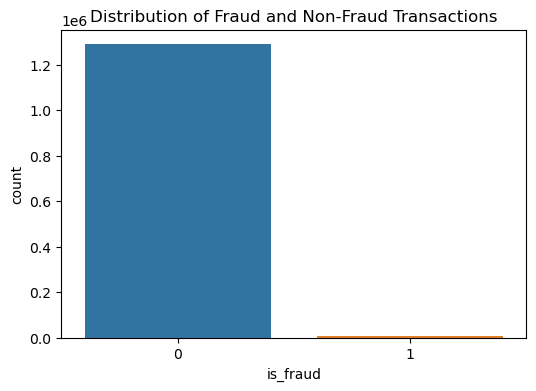

In [14]:
# Distribution of the target variable 'is_fraud'
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=card_transactions)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

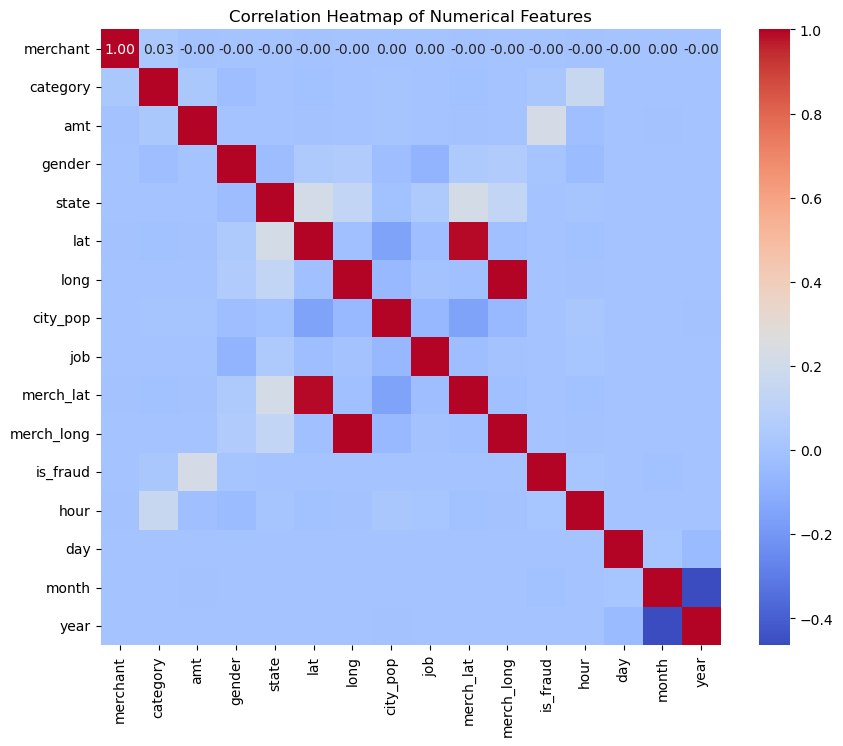

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(card_transactions.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [16]:
# Model training
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

In [17]:
# Model evaluation
target_pred = model.predict(features_test)

# Model performance
print("\nConfusion Matrix:")
print(confusion_matrix(target_test, target_pred))
print("\nClassification Report:")
print(classification_report(target_test, target_pred))
print("\nAccuracy Score:")
print(accuracy_score(target_test, target_pred))


Confusion Matrix:
[[257671    144]
 [  1520      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335


Accuracy Score:
0.9935835887944164


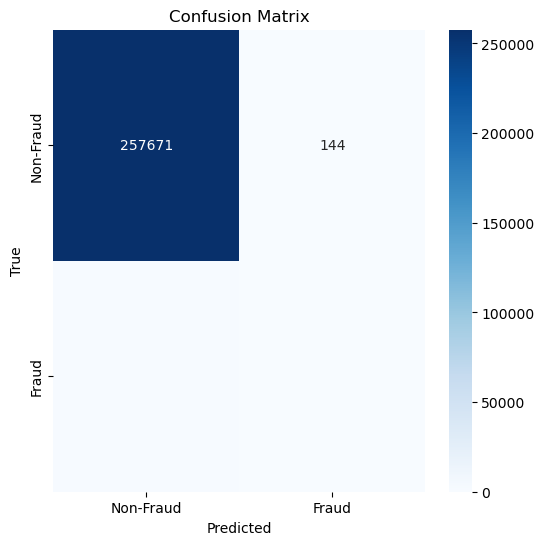

In [18]:
# Confusion Matrix Heatmap
# Generate confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)

# Plotting confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()